In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

In [3]:
if not os.path.exists('180960__kleeb__gunshot.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/180960__kleeb__gunshot.wav

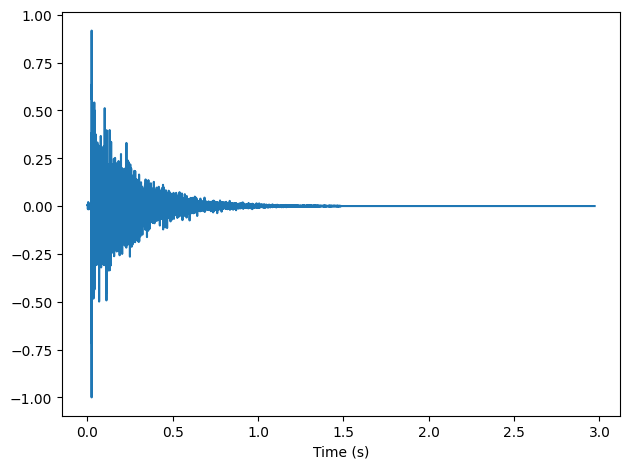

In [4]:
from thinkdsp import read_wave

response = read_wave('180960__kleeb__gunshot.wav')

start = 0.12
response = response.segment(start=start)
response.shift(-start)

response.truncate(2**16)
response.zero_pad(2**17)

response.normalize()
response.plot()
decorate(xlabel='Time (s)')

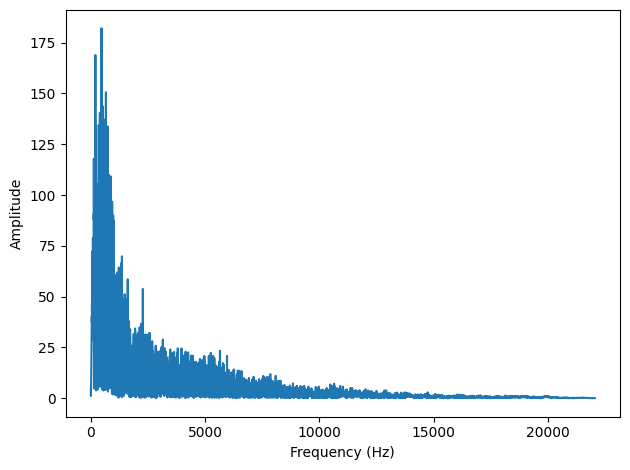

In [5]:
transfer = response.make_spectrum()
transfer.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [6]:
if not os.path.exists('92002__jcveliz__violin-origional.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav

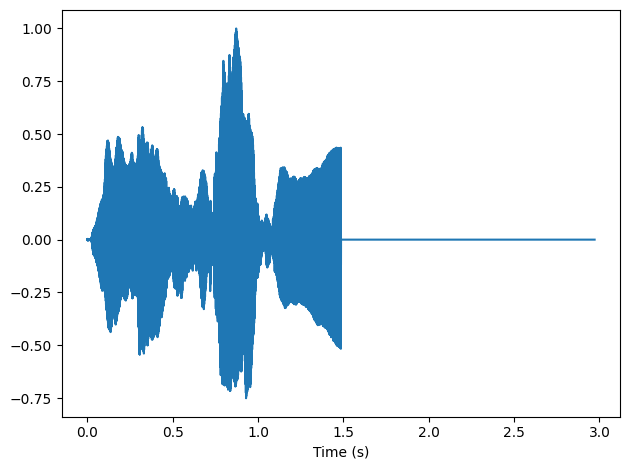

In [7]:
violin = read_wave('92002__jcveliz__violin-origional.wav')

start = 0.11
violin = violin.segment(start=start)
violin.shift(-start)
#Приведем оба сигнала к размерности 16, затем заполним нулями с помощью zero_pad
violin.truncate(2**16)
violin.zero_pad(2**17)

violin.normalize()
violin.plot()
decorate(xlabel='Time (s)')

In [8]:
spectrum = violin.make_spectrum()

In [9]:
output = (spectrum * transfer).make_wave()
output.normalize()

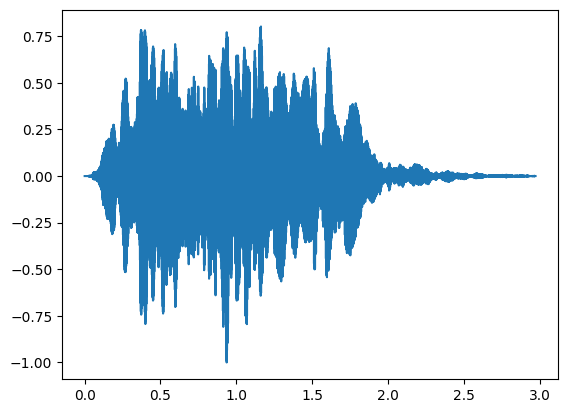

In [10]:
output.plot()

In [11]:
output.make_audio()

Больше нет лишней ноты в начале, избежали заворота

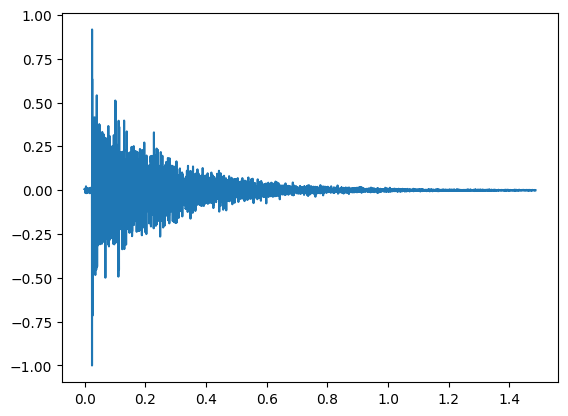

In [12]:
response.truncate(2**16)
response.plot()

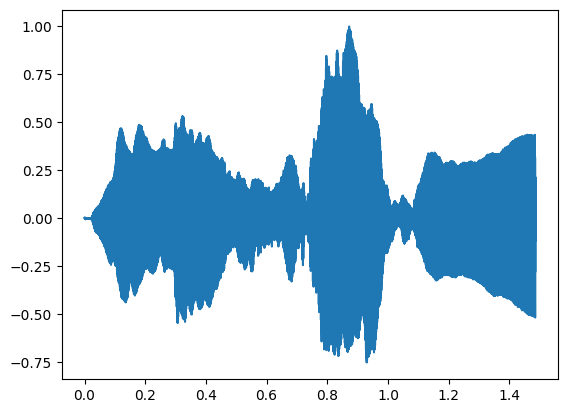

In [13]:
violin.truncate(2**16)
violin.plot()

Теперь проверим `np.convolve` и `scipy.signal.fftconvolve`

In [14]:
output2 = violin.convolve(response)

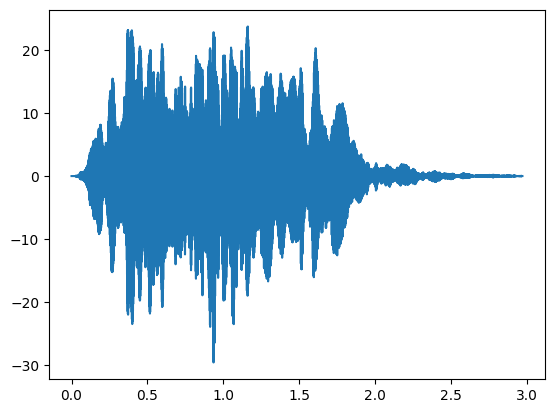

In [15]:
output2.plot()

In [16]:
output2.make_audio()

In [17]:
len(output), len(output2)

(131072, 131071)

Результат получился тот же, но немного другой длины

In [18]:
from thinkdsp import Wave

import scipy.signal
ys = scipy.signal.fftconvolve(violin.ys, response.ys)
output3 = Wave(ys, framerate=violin.framerate)

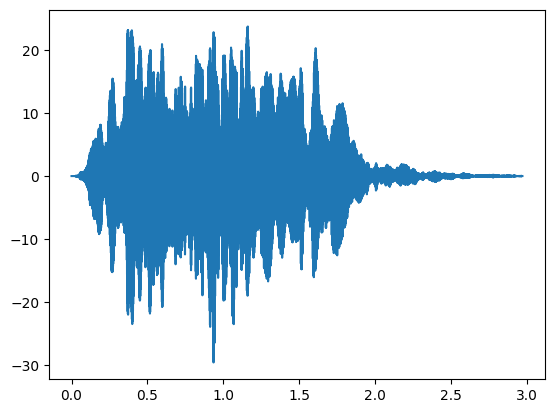

In [19]:
output3.plot()

In [20]:
output3.make_audio()

In [21]:
output2.max_diff(output3)

1.7763568394002505e-14

Результат получаем тот же, с очень маленькой погрешностью